In [1]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras import initializers
import numpy as np
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Cargo Data

In [162]:
folder = 'DATA/'
x = np.load(folder+'train_images.npy')
y = np.loadtxt(folder+'train_labels.csv', delimiter=',', skiprows=1)
x_test = np.load(folder+'test_images.npy')

In [163]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.1)

In [164]:
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_valid)

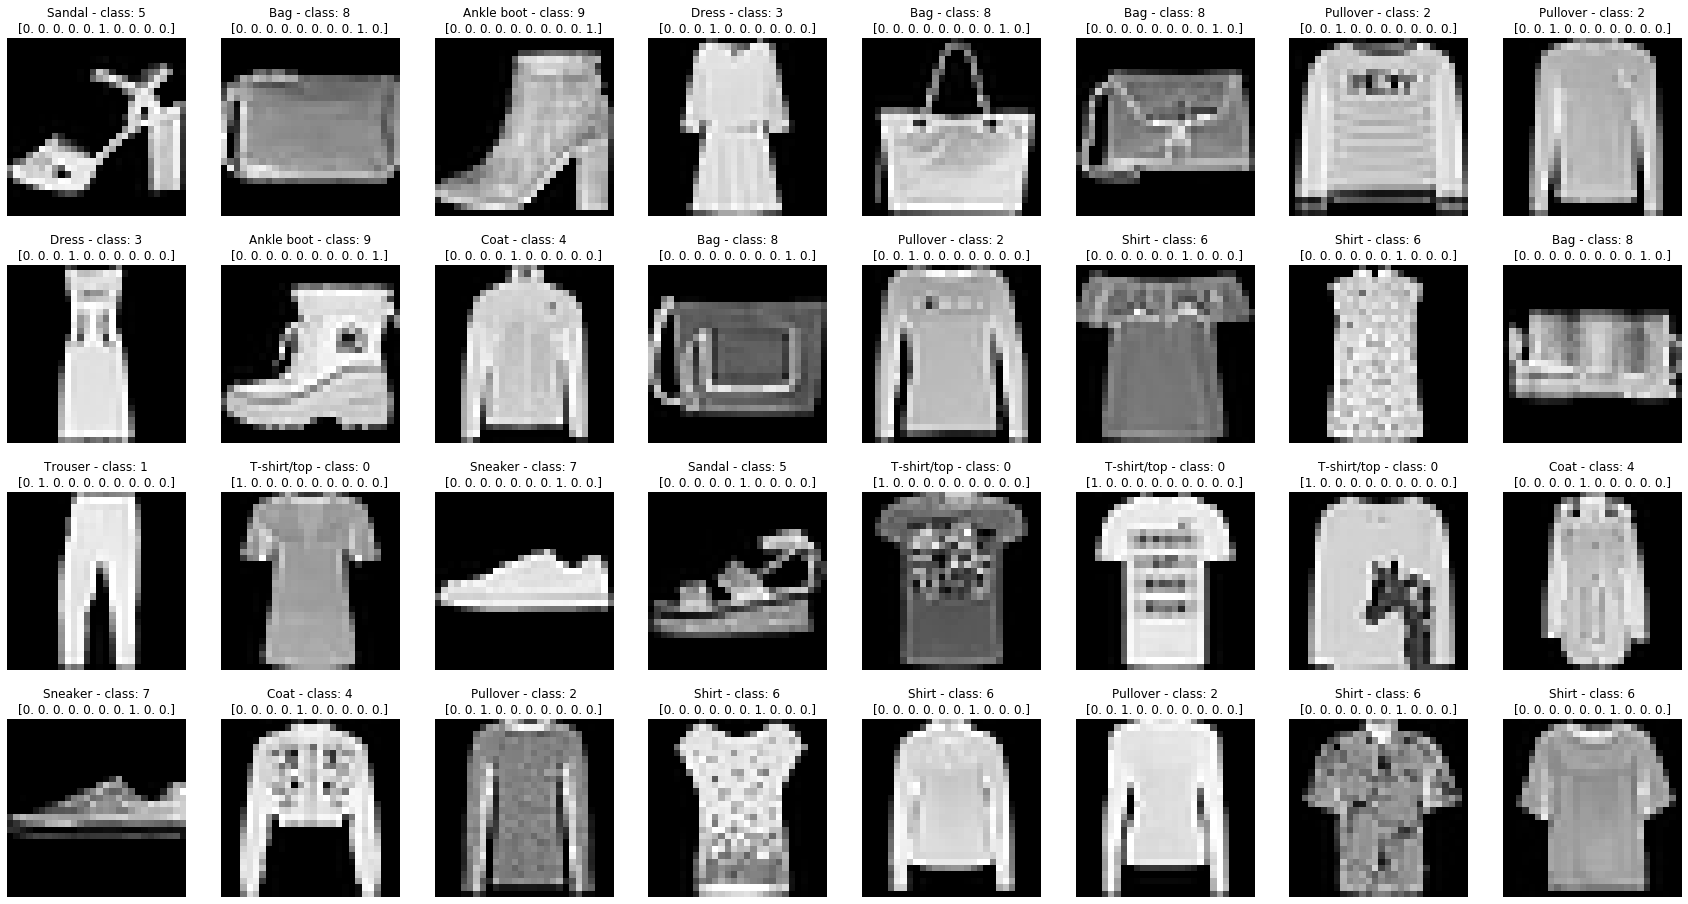

In [165]:
alto = 4
ancho = 8
f, axs = plt.subplots(alto, ancho, figsize=(30,4*alto))
axs = axs.reshape(-1)
for i in range(alto*ancho):
    axs[i].imshow(x_train[i], cmap='gray')
    axs[i].set_title(f'{classes[int(y_train[i])]} - class: {int(y_train[i])}\n{y_train_categorical[i]}')
    axs[i].axis('off')

In [203]:
x_train = x_train/255
x_valid = x_valid/255
y_train = y_train/255
y_valid = y_valid/255 

In [217]:
output_size = 10

model_mlp = Sequential()
model_mlp.add(Flatten(input_shape=x_train.shape[1:]))
model_mlp.add(Dense(units=100,activation='relu'))
model_mlp.add(Dense(units=100,activation='relu'))
model_mlp.add(Dense(units=100,activation='relu'))
model_mlp.add(Dense(output_size, name='Salida'))
model_mlp.add(Activation('softmax'))
model_mlp.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_37 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_64 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_65 (Dense)             (None, 100)               10100     
_________________________________________________________________
Salida (Dense)               (None, 10)                1010      
_________________________________________________________________
activation_32 (Activation)   (None, 10)                0         
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________

In [209]:
#lr = 0.001 
#SGD = optimizers.sgd(lr=lr)
model_mlp.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

#model.compile(loss='binary_crossentropy', optimizer='adam')

In [210]:
batch_size = 512
model_mlp.fit(x_train, 
                       y_train_categorical,
                       epochs=20, batch_size=batch_size, 
                       verbose=1, 
                       validation_data = (x_valid, y_val_categorical)
                      )

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 1s 22us/step - loss: 0.3262 - accuracy: 0.9000 - val_loss: 0.3254 - val_accuracy: 0.9000
Epoch 2/20
54000/54000 [==============================] - 1s 14us/step - loss: 0.3254 - accuracy: 0.9000 - val_loss: 0.3254 - val_accuracy: 0.9000
Epoch 3/20
54000/54000 [==============================] - 1s 16us/step - loss: 0.3253 - accuracy: 0.9000 - val_loss: 0.3255 - val_accuracy: 0.9000
Epoch 4/20
54000/54000 [==============================] - 1s 16us/step - loss: 0.3253 - accuracy: 0.9000 - val_loss: 0.3251 - val_accuracy: 0.9000
Epoch 5/20
54000/54000 [==============================] - 1s 15us/step - loss: 0.3253 - accuracy: 0.9000 - val_loss: 0.3252 - val_accuracy: 0.9000
Epoch 6/20
54000/54000 [==============================] - 1s 14us/step - loss: 0.3253 - accuracy: 0.9000 - val_loss: 0.3252 - val_accuracy: 0.9000
Epoch 7/20
54000/54000 [==============================] - 1s 14us/ste

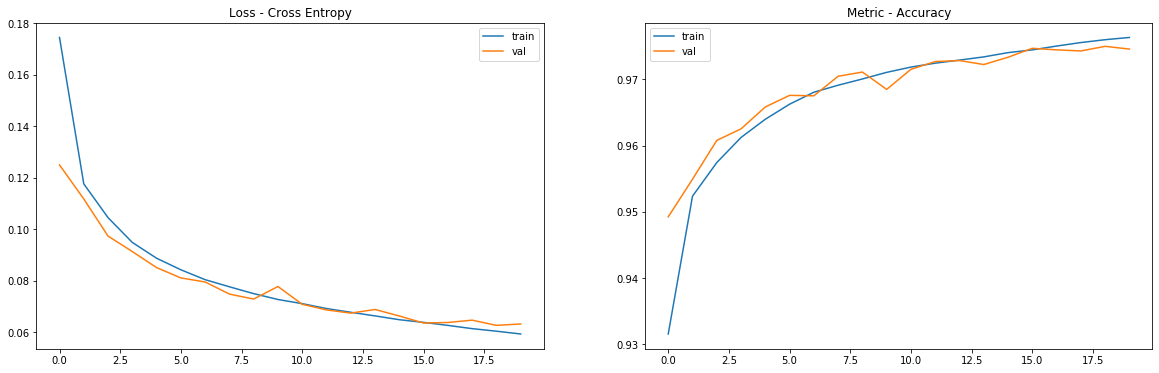

In [197]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.plot(model_mlp.history.history['loss'], label='train')
ax1.plot(model_mlp.history.history['val_loss'], label='val')
ax1.set_title('Loss - Cross Entropy')
ax1.legend()
ax2.plot(model_mlp.history.history['accuracy'], label='train')
ax2.plot(model_mlp.history.history['val_accuracy'], label='val')
ax2.set_title('Metric - Accuracy')
ax2.legend()
plt.show()

In [198]:
loss, acc = model_mlp.evaluate(x_valid, y_val_categorical, verbose=0)
print(acc, loss)

0.9745499491691589 0.06324457764625549


In [199]:
# Calculo probabilidades de cada clase para cada observación
test_prediction = model_mlp.predict(x_test)
print(test_prediction.shape)

(10000, 10)


In [200]:
# Calculo clase
test_labels = np.argmax(test_prediction, axis = 1)
print(test_labels)

[3 2 9 ... 2 0 8]


# Armo CSV para submitear

In [201]:
import pandas
df = pandas.DataFrame(data={"Category": test_labels}).astype(int)
df.to_csv("./submission.csv", sep=',',index=True,  index_label='Id')